In [1561]:

from pathlib import Path
import pandas as pd
import tensorflow as tf
import torch
import torchaudio
import numpy as np
import matplotlib.pyplot as plt
import random
from torchaudio import transforms
import librosa
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sns
#from sklearn.metrics import plot_confusion_matrix
from tensorflow.keras import datasets, layers, models
import math
input_dir = Path.cwd()
files = list(input_dir.rglob("*.mp3*")) # store a list of all audio paths
testingPaths = list(input_dir.rglob("*.wav*"))
#print(files[0])
folders = list(input_dir.glob("*class*"))
#print(folders)
#RECHANNEL ADDITIONAL DATA, ADD THE FUNCTION]

# 7, 65,21

In [1562]:
# label = 0
# counter1 = -1
# finalLabels = []
# for i in range(len(files)):
#     counter1 = counter1 + 1
#     if counter1 % 40 == 0 and counter1 != 0:
#         label = label + 1
#     print(i, counter1, label)
#     finalLabels.append(label)
    

In [1563]:
print(len(testingPaths))

15


In [1564]:
#print(finalLabels[1999
                #  ])

In [1565]:
# updatedFiles = []
# num = 0
# for i in range(50):
#     for j in range(30):
#         updatedFiles.append(files[j + num])
#     num  = num + 40


In [1566]:
# updatedTestingFiles = []
# num = 30
# for i in range(50):
#         for j in range(10):
#             updatedTestingFiles.append(files[j + num])
#         num = num + 40
        

In [1567]:
# updatedTrainingLabels = []
# num = 0
# for i in range(50):
#     for j in range(30):
#         updatedTrainingLabels.append(finalLabels[j + num])
#     num  = num + 40

In [1568]:
# updatedTestingLabels = []
# num = 30
# for i in range(50):
#         for j in range(10):
#             updatedTestingLabels.append(finalLabels[j + num])
#         num = num + 40

In [1569]:
# print(updatedTestingLabels[6])
# print(updatedTestingFiles[20])
# print(len(updatedTestingFiles))
# print(len(updatedTestingLabels))

In [1570]:
mixedRecordings = []
counter = 0
for testingPath in testingPaths:
    
    
    if int(str(testingPath)[55:56]) == 7 or int(str(testingPath)[55:56]) == 6 or int(str(testingPath)[55:56]) == 2:
        
        if(int(str(testingPath)[55:56]) == 2 ):
            
            if(str(testingPath)[73:74] == "G"):
                
                 mixedRecordings.append(testingPath)
        else:
           
            mixedRecordings.append(testingPath)
        
mixedRecordings
for recording in mixedRecordings:
    for path in testingPaths:
        if recording == path:
            testingPaths.remove(path)
print(len(mixedRecordings))
# #21, 65, 7 
#0,15,30, 9


0


In [1571]:
# print(len(mixedRecordings))
#mixedRecordings = updatedTestingFiles
# print(testingPaths)
print(len(mixedRecordings))


0


In [1572]:

class_names = []


In [1573]:
PATH_IDENTIFIER = 57
data = [[]]
for file, folder in zip(files, folders):
    data.append([file, folder])
data.pop(0)
updatedData = data
for i in range(len(updatedData)):
    updatedData[i][1] = str(data[i][1])[55:]
dftrain = pd.DataFrame(updatedData, columns = ['FilePath', 'Class ID'])
dftrain
#arranged the meta data with files paths corresponding to classIds
print(str(testingPaths[0])[:57])
print(str(files[0])[:60])
print(testingPaths.index(testingPaths[1]))

c:\Users\anand\OneDrive\Desktop\WesternGhatsFrogs\class0\
c:\Users\anand\OneDrive\Desktop\WesternGhatsFrogs\class0\Dut
1


In [1574]:
# class_names = []
# morePaths = dftrain['FilePath']
# classIds = dftrain["Class ID"]
# dict = {}
# for i in range(71):
#     dict[int(classIds[i])] = str(morePaths[i])[57:-4]
# myKeys = list(dict.keys())
# myKeys.sort()
# sorted_dict = {i: dict[i] for i in myKeys}
# sorted_dict
# class_names = dict.values()
# class_names

In [1575]:
testingLabels = [] #extends the labels and testingPaths to the data array and label array
paths1 = dftrain['FilePath']
paths1 = list(paths1)

for path in testingPaths:
    for nextPath in paths1:
      
        #print(str(path)[:PATH_IDENTIFIER]  str(nextPath)[:PATH_IDENTIFIER])
        if str(path)[:PATH_IDENTIFIER] == str(nextPath)[:PATH_IDENTIFIER]:
            
            testingLabels.append(int(dftrain.iloc[paths1.index(nextPath)][1]))
            break
print(dftrain)
# print(testingLabels)


                                             FilePath Class ID
0   c:\Users\anand\OneDrive\Desktop\WesternGhatsFr...        0
1   c:\Users\anand\OneDrive\Desktop\WesternGhatsFr...       11
2   c:\Users\anand\OneDrive\Desktop\WesternGhatsFr...       15
3   c:\Users\anand\OneDrive\Desktop\WesternGhatsFr...        2
4   c:\Users\anand\OneDrive\Desktop\WesternGhatsFr...       25
5   c:\Users\anand\OneDrive\Desktop\WesternGhatsFr...       30
6   c:\Users\anand\OneDrive\Desktop\WesternGhatsFr...       38
7   c:\Users\anand\OneDrive\Desktop\WesternGhatsFr...       39
8   c:\Users\anand\OneDrive\Desktop\WesternGhatsFr...        4
9   c:\Users\anand\OneDrive\Desktop\WesternGhatsFr...       41
10  c:\Users\anand\OneDrive\Desktop\WesternGhatsFr...       58
11  c:\Users\anand\OneDrive\Desktop\WesternGhatsFr...        9


In [1576]:
# class_names = []
# for i in range(71):
#     class_names.append(i)

In [1577]:
# NUM_CLASSES = -1
# classes = dftrain["Class ID"]

# for aClass in classes:
#     if int(aClass) > NUM_CLASSES:
#         NUM_CLASSES = int(aClass)
# NUM_CLASSES = NUM_CLASSES + 1
# print(NUM_CLASSES)


In [1578]:
print(len(paths1))

12


In [1579]:
paths1.append(testingPaths[4])
paths1.append(testingPaths[5])
paths1.append(testingPaths[7])
testingPaths.pop(4)
testingPaths.pop(4)
testingPaths.pop(5)
testingLabels.pop(4)
testingLabels.pop(4)
testingLabels.pop(5)

25

In [1580]:
    testingLabels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
#[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 3, 3, 4]
    print(testingLabels)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [1581]:
#print(updatedFiles)
mixedRecordings = testingPaths

In [1582]:
print(len(mixedRecordings))

12


In [1583]:

paths1 = list(paths1)
#paths.extend(testingPaths)
INITIAL_SAMPLE_NUM = len(paths1)
paths1.extend(mixedRecordings)
data1 = []
for path in paths1:
    data1.append(torchaudio.load(path))
waveform, sample_rate = torchaudio.load(dftrain['FilePath'][0])
#len(data1[0])



In [1584]:
print(len(data1))

27


In [1585]:
# def plot_waveform(waveform, sample_rate):
#    # waveform = waveform.numpy()

#     num_channels, num_frames = waveform.shape
#     time_axis = torch.arange(0, num_frames) / sample_rate

#     figure, axes = plt.subplots(num_channels, 1)
#     if num_channels == 1:
#         axes = [axes]
#     for c in range(num_channels):
#         axes[c].plot(time_axis, waveform[c], linewidth=1)
#         axes[c].grid(True)
#         if num_channels > 1:
#             axes[c].set_ylabel(f"Channel {c+1}")
#     figure.suptitle("waveform")
#     plt.show(block=False)

In [1586]:

def re_channel(aud):
    sig, sr = aud 
    if(sig.shape[0] == 1):
        print("hi")
        resig = torch.cat([sig, sig])
        return (resig, sr)
    else:
        return (sig, sr)

In [1587]:
print(len(data1))

27


(128, 786)
(128, 786)


[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

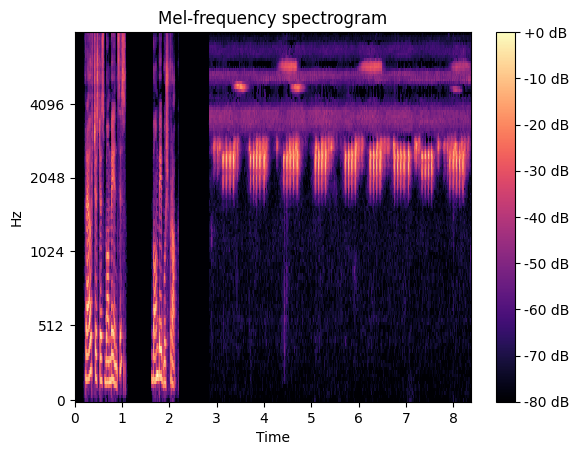

In [1588]:
fig, ax = plt.subplots()
#print(data1[71][0].shape)
sample_data = librosa.load(paths1[3
                                 ])

#print(sample_data[].shape)
spect = librosa.feature.melspectrogram(y=np.array(sample_data[0]), sr=sample_data[1], n_mels=128,
                                    fmax=10000)
print(spect.shape)
S_dB = librosa.power_to_db(spect, ref=np.max)
print(S_dB.shape)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=48000,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

In [1589]:
for i in range(0, len(data1)):
    data1[i]  = re_channel(data1[i])
    

hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi


In [1590]:
 def resample(aud, newsr):
    sig, sr = aud
    if (sr == newsr):
      # Nothing to do
      return aud

    num_channels = sig.shape[0]
    # Resample first channel
    resig = torchaudio.transforms.Resample(sr, newsr)(sig[:1,:])
    if (num_channels > 1):
      # Resample the second channel and merge both channels
      retwo = torchaudio.transforms.Resample(sr, newsr)(sig[1:,:])
      resig = torch.cat([resig, retwo])

    return (resig, newsr)

In [1591]:
for i in range(0, len(data1)):
    data1[i]= resample(data1[i], 48000)

for i in range(0, len(data1)):
    print(data1[i][0].shape)
    print(data1[i][1])

torch.Size([2, 842265])
48000
torch.Size([2, 774006])
48000
torch.Size([2, 1277702])
48000
torch.Size([2, 875993])
48000
torch.Size([2, 885166])
48000
torch.Size([2, 755854])
48000
torch.Size([2, 1173704])
48000
torch.Size([2, 1865964])
48000
torch.Size([2, 1150239])
48000
torch.Size([2, 998212])
48000
torch.Size([2, 1220260])
48000
torch.Size([2, 1158646])
48000
torch.Size([2, 3168000])
48000
torch.Size([2, 2784000])
48000
torch.Size([2, 3984000])
48000
torch.Size([2, 1827840])
48000
torch.Size([2, 2400000])
48000
torch.Size([2, 2688000])
48000
torch.Size([2, 5280000])
48000
torch.Size([2, 1440000])
48000
torch.Size([2, 1008000])
48000
torch.Size([2, 1296000])
48000
torch.Size([2, 3796992])
48000
torch.Size([2, 3216000])
48000
torch.Size([2, 1363968])
48000
torch.Size([2, 1737449])
48000
torch.Size([2, 864000])
48000


In [1592]:
print(data1[0][0].shape)
# does padding 0s affect output
maximum = 0
for data in data1:
    maximum =  max(data[0].shape[1], maximum)
maximum


torch.Size([2, 842265])


5280000

In [1593]:
  def pad_trunc(aud, max_ms):
    sig, sr = aud
    num_rows, sig_len = sig.shape
    max_len = sr//1000 * max_ms

    if (sig_len > max_len):
      # Truncate the signal to the given length
      print("hill")
      sig = sig[:,:max_len]

    elif (sig_len < max_len):
      print("hi")
      # Length of padding to add at the beginning and end of the signal
      #pad_begin_len = random.randint(0, max_len - sig_len)
      pad_end_len = max_len - sig_len

      # Pad with 0s
     # pad_begin = torch.zeros((num_rows, pad_begin_len))
      pad_end = torch.zeros((num_rows, pad_end_len))

      sig = torch.cat(( sig, pad_end), 1)
      
    return (sig, sr)

In [1594]:

for i in range(0, len(data1)):
    print(data1[i][0].shape)
    print(data1[i][1])

torch.Size([2, 842265])
48000
torch.Size([2, 774006])
48000
torch.Size([2, 1277702])
48000
torch.Size([2, 875993])
48000
torch.Size([2, 885166])
48000
torch.Size([2, 755854])
48000
torch.Size([2, 1173704])
48000
torch.Size([2, 1865964])
48000
torch.Size([2, 1150239])
48000
torch.Size([2, 998212])
48000
torch.Size([2, 1220260])
48000
torch.Size([2, 1158646])
48000
torch.Size([2, 3168000])
48000
torch.Size([2, 2784000])
48000
torch.Size([2, 3984000])
48000
torch.Size([2, 1827840])
48000
torch.Size([2, 2400000])
48000
torch.Size([2, 2688000])
48000
torch.Size([2, 5280000])
48000
torch.Size([2, 1440000])
48000
torch.Size([2, 1008000])
48000
torch.Size([2, 1296000])
48000
torch.Size([2, 3796992])
48000
torch.Size([2, 3216000])
48000
torch.Size([2, 1363968])
48000
torch.Size([2, 1737449])
48000
torch.Size([2, 864000])
48000


In [1595]:
for i in range(0, len(data1)):
    data1[i]= pad_trunc(data1[i], 5000)# amount of time each clip is
    # ELIF STATEMENT IS BROKEN FOR SOME REASON
    # why is it broken???
var = 1999935

hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill
hill


In [1596]:
for i in range(0, len(data1)):
    print(data1[i][0].shape)
    print(data1[i][1])

torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000
torch.Size([2, 240000])
48000


In [1597]:
print(len(data1))

27


In [1598]:
print(type(data1[0][0]))

<class 'torch.Tensor'>


In [1599]:
# # remove talking from recordings

# to_remove = 48000 * 8
# length = 48000 * 30
# data3 = []
# to_removeOther = 48000 * 22
# #data3 = np.array(data3)
# for i in range(0, len(data1)- len(mixedRecordings)):# - len(testingPaths) 
#     samples, rates = data1[i]
#     lst1= samples[0].numpy()
#     lst2= samples[1].numpy()
#     lst1 = lst1[to_remove:]
#     lst2 = lst2[to_remove:]
#     lst = [lst1, lst2]
#     lst = np.array(lst) #makes it much faster
#     lst = torch.tensor(lst)
#     data3.append((lst, 48000))
# for i in range(len(data1) - len(mixedRecordings), len(data1)):# - len(testingPaths) 
#     samples, rates = data1[i]
#     lst1= samples[0].numpy()
#     lst2= samples[1].numpy()
#     lst1 = lst1[: to_removeOther]
#     lst2 = lst2[: to_removeOther]
#     lst = [lst1, lst2]
#     lst = np.array(lst) #makes it much faster
#     lst = torch.tensor(lst)
#     data3.append((lst, 48000))
# # remove back 8 seconds from non-mandookavani recordings
# for i in range(0, len(data1)- len(mixedRecordings)):# - len(testingPaths) 
#     print(data3[i][0].shape)
#     print(data3[i][1])
# len(data3)

In [1600]:
data3 = data1

In [1601]:
print(len(data1))

27


In [1602]:
print(len(data3))
mixedData = data3[len(data3) - len(mixedRecordings):]
data3 = data3[:len(data3) - len(mixedRecordings)]


27


In [1603]:
len(data3)

15

In [1604]:
print(type(data3))

<class 'list'>


In [1605]:
# time shift
def time_shift(aud, shift_limit):
    sig,sr = aud
    sig_len = aud[1]
    shift_amt = int(random.random() * shift_limit * sig_len)
    print(type(sig))
    return (sig.roll(shift_amt), sr)
print(len(data3))
len(mixedData)

15


12

In [1606]:
print(data1[0][0][1].shape)

torch.Size([240000])


In [1607]:
 def noise_injection(data,noise_levels=(0, 0.5)):
        sound, sr = data
        print(type(sound[0][0]))
        noise_level = np.random.uniform(*noise_levels)
        noise = np.random.randn(len(sound[0]))
        sound = np.array(sound)
      
        augmented_sound = sound + noise_level * noise
        # Cast back to same data type
        augmented_sound = augmented_sound.astype(type(sound[0]))
        augmented_sound = torch.from_numpy(sound)
        print(type(augmented_sound))
        return (augmented_sound, sr)
   

In [1608]:
def perform_noise_injections(times, data, length):
    for i in range(times):
        for i in range(length):
            data.append(noise_injection(data[i]))
        print("hi")
    return data

In [1609]:
def perform_timeShifts(times, data, length):
    for i in range(times):
        for i in range(length):
            data.append(time_shift(data[i], .5))
        
    return data

In [1610]:
print(len(data3))

15


In [1611]:
TIMES = 100
#data3 = perform_timeShifts(1, data3, 15)
#mixedData = perform_timeShifts(TIMES * 2, mixedData)

len(data3)

15

In [1612]:
 #data3 = perform_noise_injections(1, data3, 15)

In [1613]:
len(data3)

15

In [1614]:
sample = [1,2]
sample = np.array(sample)
sample = torch.from_numpy(sample)
print(type(sample))

<class 'torch.Tensor'>


In [1615]:
print(len(mixedData))

12


In [1616]:
print(type(mixedData))

<class 'list'>


In [1617]:
# #print(data3[4000][0][0][30000])
# print(type(mixedData[0][0][0]))
# print()
# for i in range(15):
    
#     new_data = mixedData[i]
#     pads = torch.zeros(new_data[1] * 22 - new_data[1] * 6)
#     lastPadding = torch.zeros(new_data[1] * 18)
#     #print(type(data))
#     #print(type(new_data[0][0].numpy()))
#   #  new_data[0][0] = new_data[0][0].numpy()
#     #new_data[0][1] = np.array(new_data[0][1])
#     #print(type(torch.from_numpy(new_data[0][0].numpy()[:new_data[1] * 6])))
#     new_data[0][0] = torch.cat((torch.from_numpy(new_data[0][0].numpy()[:new_data[1] * 6]), pads))
#     new_data[0][1] = torch.cat((torch.from_numpy(new_data[0][1].numpy()[:new_data[1] * 6]), pads))
#    # print(mixedData.shape, new_data.shape)
#     print("1")
#     mixedData.append(new_data)
#     print("2")
#     new_data[0][0] = torch.cat((torch.from_numpy(new_data[0][0].numpy()[new_data[1] * 6:new_data[1] * 12]), pads))
#     new_data[0][1] = torch.cat((torch.from_numpy(new_data[0][1].numpy()[new_data[1] * 6:new_data[1] * 12]), pads))
#     mixedData.append(new_data)
#     new_data[0][0] = torch.cat((torch.from_numpy(new_data[0][0].numpy()[new_data[1] * 12: new_data[1] * 18]), pads))
#     new_data[0][1] = torch.cat((torch.from_numpy(new_data[0][1].numpy()[new_data[1] * 12: new_data[1] * 18]), pads))
#     #print(data[0].shape)
#     mixedData.append(new_data)
#     new_data[0][0] = torch.cat((torch.from_numpy(new_data[0][0].numpy()[new_data[1] * 18:]), lastPadding))
#     new_data[0][1] = torch.cat((torch.from_numpy(new_data[0][1].numpy()[new_data[1] * 18:]), lastPadding))
#     mixedData.append(new_data)
#     print(i) 

In [1618]:
print(len(mixedData))

12


In [1619]:
 #mixedData = perform_timeShifts(2, mixedData, 500)

In [1620]:
# mixedData = perform_noise_injections(2, mixedData, 500)

In [1621]:
print(len(mixedData))

12


In [1622]:
print(len(mixedData))

12


In [1623]:
# testing_labels = [21, 65, 7]
# for i in range(TIMES * 4):
#     testing_labels.extend([21,65,7])
# # # creating testing labels
# #MIXED RECORDINGS

In [1624]:
# testingLabels = []
# testingLabels.extend([0, 11, 15, 2, 2, 2, 25, 25, 30, 38, 39, 4, 41, 58, 9])
# # for i in range(15):
# #     testingLabels.extend([testingLabels[i],testingLabels[i], testingLabels[i], testingLabels[i] ])
# for i in range(TIMES):
#     testingLabels.extend([0, 11, 15, 2, 2, 2, 25, 25, 30, 38, 39, 4, 41, 58, 9])


In [1625]:
#print(len(testingLabels))

In [1626]:
instantLabel = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 3, 3, 4]
#[0, 11, 15, 2, 25, 30, 38, 39, 4, 41, 58, 9, 2, 2, 25]
labels = []
labels.extend(instantLabel)
# for i in range(2):
#      labels.extend(instantLabel)
    #print(len(labels))
   
   # labels.extend(testingLabels)
# for i in range(len(labels)):
#         labels[i] = int(labels[i])

# for i in range(0, 4):
#       print(labels[74])
#       #0, 30, 51, 9

In [1627]:

# labels1 = []
# labels1.extend(updatedTestingLabels)
# # for i in range(4):
# #      labels1.extend(updatedTestingLabels)

In [1628]:
# print(updatedTrainingLabels[30])

In [1629]:
# mel spectrogram turning its hyperparameters
def spectro_gram(aud, n_mels=64, n_fft=1024, hop_len=None):
    sig,sr = aud
    top_db = 80

    # spec has shape [channel, n_mels, time], where channel is mono, stereo etc
    spec = transforms.MelSpectrogram(sr, n_fft=n_fft, hop_length=hop_len, n_mels=n_mels)(sig)

    # Convert to decibels
    spec = transforms.AmplitudeToDB(top_db=top_db)(spec)
    return (spec)

In [1630]:
melData = []
tf_data = []
data3.extend(mixedData)
print(len(data3))

for data in data3:
    
    specto = spectro_gram(data)
    
    melData.append(specto)
   
    # num_channels, num_mels, time
print("hi")
for data in melData:
    
    #np_array = data.numpy()# DO I HAVE TO DO THIS LINE?
    np_array = np.array(data)
    tf_data.append(np_array)
melData = np.array(melData)



27
hi


C:\Users\anand\AppData\Local\Temp\ipykernel_16624\1843991304.py:19: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  melData = np.array(melData)
C:\Users\anand\AppData\Local\Temp\ipykernel_16624\1843991304.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  melData = np.array(melData)


In [1631]:
  # ----------------------------
  # Augment the Spectrogram by masking out some sections of it in both the frequency
  # dimension (ie. horizontal bars) and the time dimension (vertical bars) to prevent
  # overfitting and to help the model generalise better. The masked sections are
  # replaced with the mean value.
  # ----------------------------

  def spectro_augment(spec, max_mask_pct=0.1, n_freq_masks=1, n_time_masks=1):
    _, n_mels, n_steps = spec.shape
    mask_value = spec.mean()
    aug_spec = spec

    freq_mask_param = max_mask_pct * n_mels
    for _ in range(n_freq_masks):
      aug_spec = transforms.FrequencyMasking(freq_mask_param)(aug_spec, mask_value)

    time_mask_param = max_mask_pct * n_steps
    for _ in range(n_time_masks):
      aug_spec = transforms.TimeMasking(time_mask_param)(aug_spec, mask_value)
    return aug_spec

In [1632]:
print(type(spectro_augment(torch.from_numpy(tf_data[0])).numpy()))

<class 'numpy.ndarray'>


In [1633]:
mixedData = tf_data[len(tf_data) - len(mixedData):]
tf_data = tf_data[:len(tf_data) - len(mixedData)]

In [1634]:
print(len(labels))

15


In [1635]:
# initialLen = len(tf_data)
# for i in range(initialLen):   
 
#     tf_data.append(spectro_augment(torch.from_numpy(tf_data[i])).numpy())
    


In [1636]:
# labels2 = labels
# labels.extend(labels2)
# #labels.extend(testingLabels)

In [1637]:
    # mixedData = list(mixedData)
    # initialLen = len(mixedData)
    # for i in range(initialLen): 
  
    #     mixedData.append(spectro_augment(torch.from_numpy(mixedData[i])).numpy())

In [1638]:
# labels2 = testingLabels
# testingLabels.extend(labels2)


In [1639]:
print(len(testingLabels))

12


In [1640]:
for data in tf_data:
    print(data.shape)

(2, 64, 469)
(2, 64, 469)
(2, 64, 469)
(2, 64, 469)
(2, 64, 469)
(2, 64, 469)
(2, 64, 469)
(2, 64, 469)
(2, 64, 469)
(2, 64, 469)
(2, 64, 469)
(2, 64, 469)
(2, 64, 469)
(2, 64, 469)
(2, 64, 469)


In [1641]:

tf_data = np.array(tf_data)
                   

In [1642]:
print(len(tf_data))
print(.21
       * len(tf_data))

15
3.15


In [1643]:
# labels = np.array(labels)
#testingLabels = np.array(testingLabels)

# training_data = tf_data[:len(data3) - len(mixedData)]
# testing_data = tf_data[len(data3) - len(mixedData):]
# training_labels = labels

#mixedData = tf_data[len(tf_data) - len(mixedData):]
#tf_data = tf_data[: len(tf_data) - len(mixedData)]'
# should i increase the amount of sample in testing set
print(len(tf_data))
print(len(labels))
breakdown = int(.79
                *len(tf_data))
training_data = tf_data
#testing_data = tf_data[breakdown:]
training_labels = labels
training_labels = np.array(training_labels)
# testing_labels = labels[breakdown: ]# numpy arrays with numpy integer
testing_data = mixedData
testing_labels = testingLabels


15
15


In [1644]:

# use a pretrained model  AlexNet, Mobilenet, Xception
# research neural networks 

print(type(training_data))
testing_labels = np.array(testing_labels)

<class 'numpy.ndarray'>


In [1645]:
print(len(testing_labels))

12


In [1646]:
print(testing_labels[9
                     ])

9


In [1647]:
# def tensor_to_img(spectrogram): 
#     plt.imshow(spectrogram[0],aspect='auto', origin='lower')
#     plt.show();
#     display(spectrogram.shape)
# tensor_to_img(testing_data[138])

In [1648]:
mixedData = np.array(mixedData)

#testing_data = np.concatenate((testing_data, mixedData))
#testing_labels = np.concatenate((testing_labels, testingLabels))


In [1649]:
testing_data = np.array(testing_data)
print(type(testing_labels))

<class 'numpy.ndarray'>


In [1650]:
training_data = np.rollaxis(training_data,1,3)  
training_data = np.rollaxis(training_data,3,2)  
print(training_data.shape)

(15, 64, 469, 2)


In [1651]:
testing_data = np.rollaxis(testing_data,1,3)  
testing_data = np.rollaxis(testing_data,3,2)  
print(testing_data.shape)

(12, 64, 469, 2)


In [1652]:
import keras
optimizer = keras.optimizers.Adam(lr=0.00001)

C:\Users\anand\AppData\Roaming\Python\Python311\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [1653]:

    model = models.Sequential()
    model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=( 64, 469, 2) ))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(64, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(64, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(128, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))
   # model.add(layers.Conv2D(128, (3,3), activation='relu'))
    #model.add(layers.Conv2D(128, (1,1), activation='relu'))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    #model.add(layers.Dropout(.25))
#dropout.  1    
    model.add(layers.Dense(12, activation = 'softmax'))

In [1654]:
print(len(training_data))


15


In [1655]:
# 20 epochs worked well -> more 92.9
# 40 epoc -> 95.6 accuracy
# 60 -> 98.3 accuracy

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(training_data, training_labels, epochs=60   , 
                    validation_data=(testing_data, testing_labels))

# test 1 recording from test spceies
# is mel spectrogram a case
# try without augmentaiotn / small nn (40 % training accuracy 0-6% testing accuracy)
# try with agmentaiton / small nn ( if jump is not big enough, mel spectrogarm not good neough ( small nn with 92% training accuracy, 66% testing accuracy), validiation accuracy failes to increase afrter accuracy of arround 70 percent training
# try with augmentation / big nn (big nn with 93 % training accuracy, 66 accuracy)
# svm model

Epoch 1/60


C:\Users\anand\AppData\Roaming\Python\Python311\site-packages\keras\backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1/1 [==============================] - 1s 728ms/step - loss: 6.6570 - accuracy: 0.0667 - val_loss: 6.0652 - val_accuracy: 0.0833
Epoch 2/60
1/1 [==============================] - 0s 221ms/step - loss: 6.2374 - accuracy: 0.0000e+00 - val_loss: 5.7383 - val_accuracy: 0.0833
Epoch 3/60
1/1 [==============================] - 0s 224ms/step - loss: 5.8901 - accuracy: 0.0000e+00 - val_loss: 5.4600 - val_accuracy: 0.0833
Epoch 4/60
1/1 [==============================] - 0s 232ms/step - loss: 5.5846 - accuracy: 0.0000e+00 - val_loss: 5.2218 - val_accuracy: 0.0833
Epoch 5/60


1/1 [==============================] - 0s 230ms/step - loss: 5.3033 - accuracy: 0.0667 - val_loss: 5.0145 - val_accuracy: 0.0833
Epoch 6/60
1/1 [==============================] - 0s 242ms/step - loss: 5.0387 - accuracy: 0.0667 - val_loss: 4.8370 - val_accuracy: 0.0833
Epoch 7/60
1/1 [==============================] - 0s 211ms/step - loss: 4.7987 - accuracy: 0.0000e+00 - val_loss: 4.6867 - val_accuracy: 0.0833
Epoch 8/60
1/1 [==============================] - 0s 225ms/step - loss: 4.5792 - accuracy: 0.0000e+00 - val_loss: 4.5623 - val_accuracy: 0.0833
Epoch 9/60
1/1 [==============================] - 0s 208ms/step - loss: 4.3755 - accuracy: 0.0667 - val_loss: 4.4592 - val_accuracy: 0.0833
Epoch 10/60
1/1 [==============================] - 0s 229ms/step - loss: 4.1847 - accuracy: 0.0667 - val_loss: 4.3688 - val_accuracy: 0.0833
Epoch 11/60
1/1 [==============================] - 0s 229ms/step - loss: 4.0068 - accuracy: 0.0667 - val_loss: 4.2814 - val_accuracy: 0.0833
Epoch 12/60
1/1 [====

In [1656]:
test_loss, test_acc = model.evaluate(testing_data,  testing_labels, verbose=2)
print(test_acc)
# how to display confidence scores of each input??? 

1/1 - 0s - loss: 3.0657 - accuracy: 0.0833 - 48ms/epoch - 48ms/step
0.0833333358168602


1/ (1 + math.exp(915.83))

In [1657]:
prediction = model.predict(testing_data).round()
#print(testing_data.shape)
#print(prediction[11][1])
updated_predictions = []
maximum = -1
for i in range(0, len(prediction)):
    print(prediction[i][testing_labels[i]] * 100,  "TestingLabel: " + str(testing_labels[i]))
    updated_predictions.append((prediction[i][testing_labels[i]] * 100,testing_labels[i]))
    #for j in range(0, len(prediction[i])):
       # if(prediction[i][j] > maximum):
           # maximum = prediction[i][j]
       # if prediction[i][j] < 0:
           # prediction[i][j] = 0
       # elif prediction [i][j] < -32:
          #  prediction[i][j] = 0
       # else:
           # prediction[i][j] = sigmoid(prediction[i][j])

#print(testing_labels[0])
print(prediction[2])
#print(maximum)
#print("prediction shape:", prediction.shape)

1/1 [==============================] - 0s 96ms/step
0.0 TestingLabel: 0
0.0 TestingLabel: 1
0.0 TestingLabel: 2
0.0 TestingLabel: 3
0.0 TestingLabel: 4
0.0 TestingLabel: 5
0.0 TestingLabel: 6
0.0 TestingLabel: 7
0.0 TestingLabel: 8
0.0 TestingLabel: 9
0.0 TestingLabel: 10
0.0 TestingLabel: 11
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [1658]:
from sklearn import metrics
print(prediction)
prediction = np.argmax(prediction, axis=1)
print(prediction)
print(metrics.f1_score(prediction, testing_labels, average='micro', pos_label='positive'))
print(metrics.precision_score(prediction, testing_labels, average='micro', pos_label='positive'))
print(metrics.recall_score(prediction, testing_labels, average='micro', pos_label='positive'))

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[0 0 3 0 0 3 0 0 0 0 0 0]
0.08333333333333333
0.08333333333333333
0.08333333333333333


C:\Users\anand\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\anand\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\anand\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [1659]:
def accuracies_for_each_class(predictions):
    new_predictions  = []
    for i in range(NUM_CLASSES):
        num = 0
        counter =0
        for accuracy in predictions:
            if (accuracy[1] == i):
                num += accuracy[0]
                counter  = counter + 1
        if counter != 0:
            average = num / counter
        else:
            average = 0
        new_predictions.append((average, i))
    return new_predictions
        
        

In [1660]:
average_predictions = accuracies_for_each_class(updated_predictions)
print(prediction[15])
print(average_predictions)

NameError: name 'NUM_CLASSES' is not defined

In [ ]:
print(len(training_data))
print(len(testing_labels))
print(len(class_names))
print(testing_labels.shape)
print(prediction.shape)
prediction = np.argmax(prediction, axis = 1)
print(prediction.shape)
cm = confusion_matrix(testing_labels, prediction)

print(cm)


30
24
0
(24,)
(24, 12)
(24,)
[[0 0 0 2 0 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 1 0 0 0 0 0 0 0 0]]


In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(200,200))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

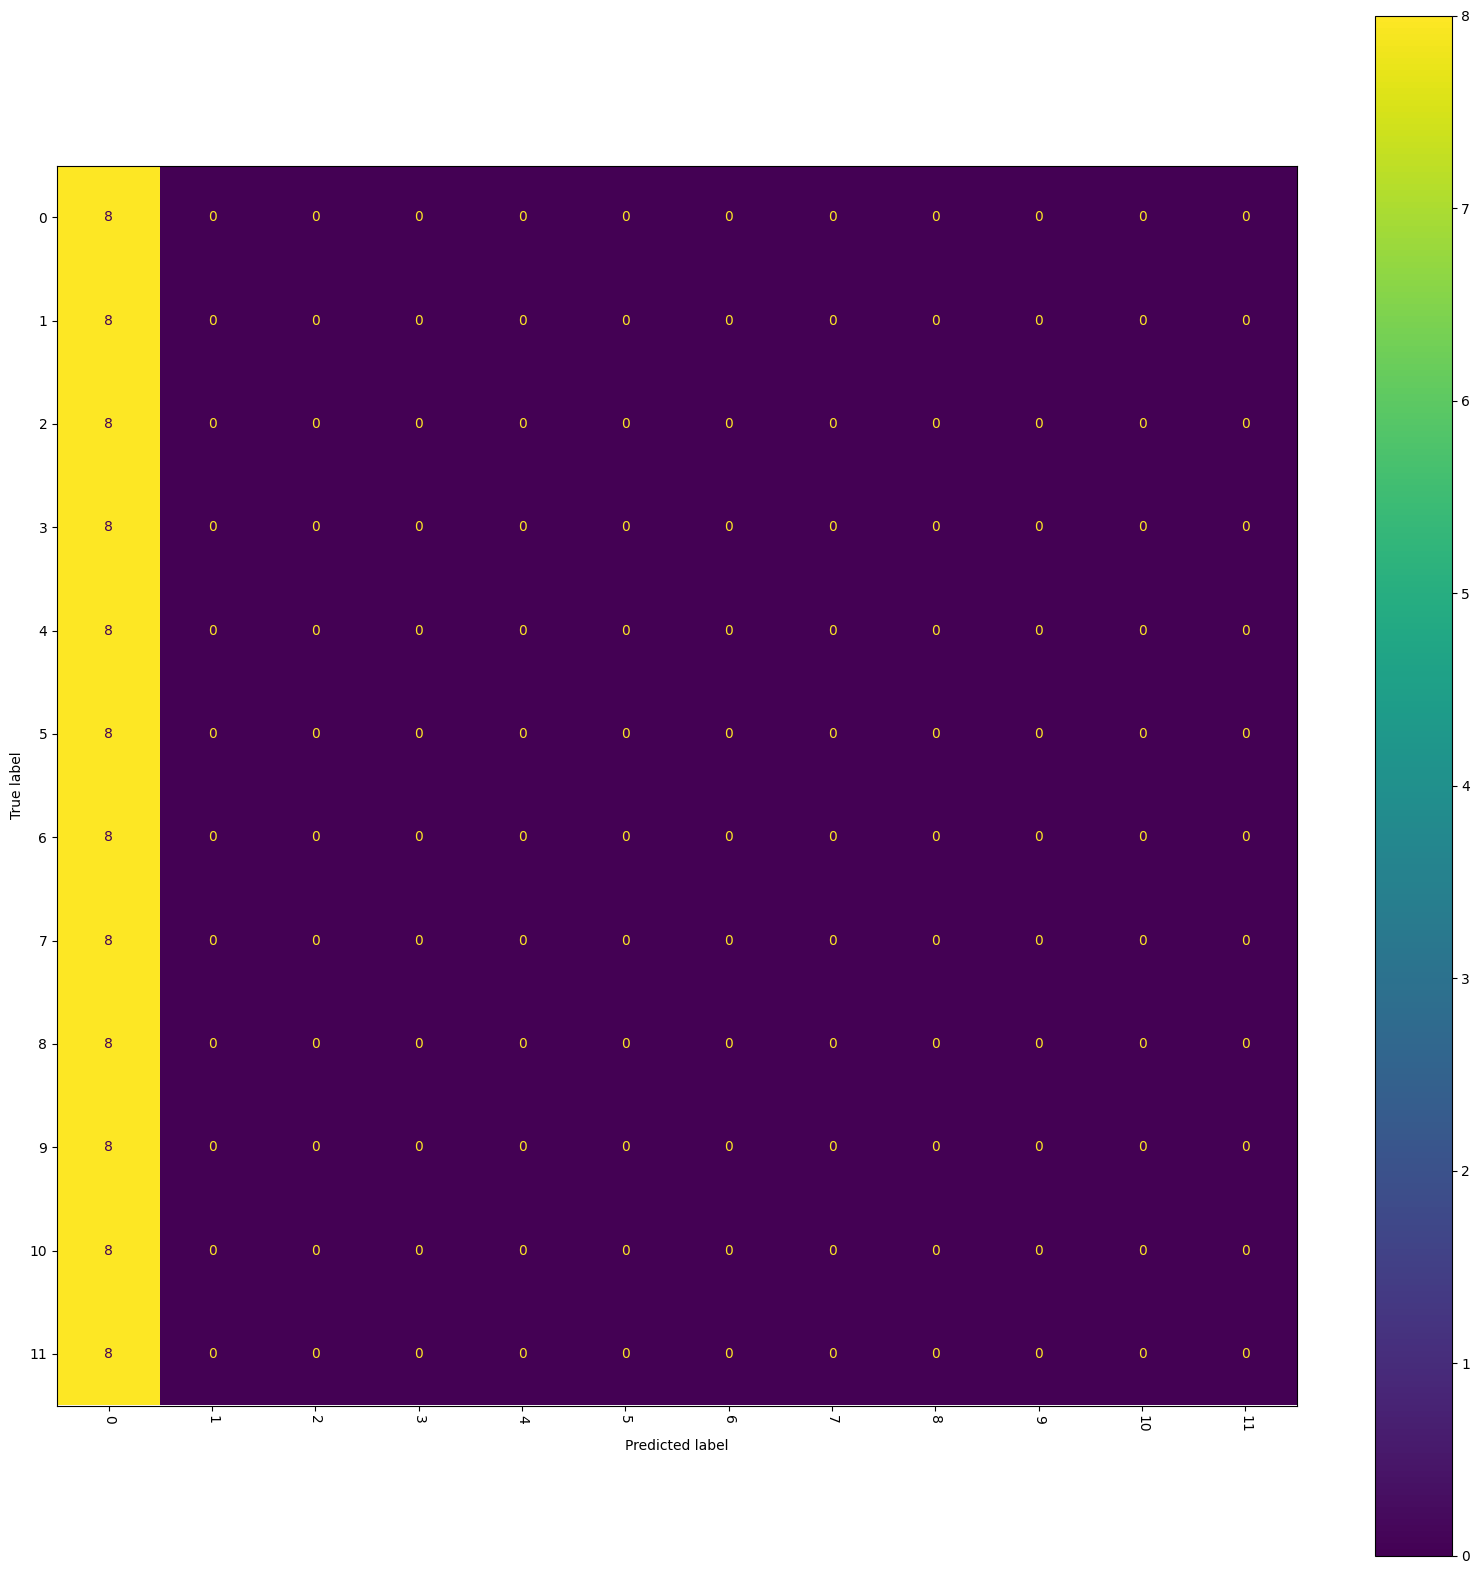

In [ ]:

cmd = ConfusionMatrixDisplay(cm, )
fig, ax = plt.subplots(figsize=(20,20))
cmd.plot(ax=ax, )
plt.xticks(rotation=270)
plt.show()
#0, 15, 30, 39, 4, 41, 58, 9

In [ ]:
sns.heatmap(cmd/np.sum(cmd), annot=True, 
            fmt='.2%', cmap='Blues')

TypeError: unsupported operand type(s) for /: 'ConfusionMatrixDisplay' and 'ConfusionMatrixDisplay'

In [ ]:
# sample = {-1}
# for predict in prediction:
#     counter = 0
#     for pre in predict:
#         if(pre  >= .1):
#             sample.add(counter)
            
#             counter = 0
#             break
#         counter = counter + 1
# sample

In [ ]:
# def plot_spectrogram(specgram, title=None, ylabel="freq_bin", ax=None):
#     if ax is None:
#         _, ax = plt.subplots(1, 1)
#     if title is not None:
#         ax.set_title(title)
#     ax.set_ylabel(ylabel)
#     ax.imshow(librosa.power_to_db(specgram), origin="lower", aspect="auto", interpolation="nearest")
#     plt.show(block=False)

In [ ]:
# fig, axs = plt.subplots(2, 1)
# #a = librosa.power_to_db(training_data[0])
# plot_spectrogram(training_data[0],title="spectrogram", ax=axs[1])

In [ ]:
# fig, ax = plt.subplots()
# print(np.array(data1[0][0].shape))
# sample = np.array(data1[0][0][:1])
# sample2 = sample
# print(sample2.shape)
# spect = librosa.feature.melspectrogram(y=np.array(data1[0][0][:1]), sr=48000, n_mels=128,
#                                     fmax=8000)
# print(spect.shape)
# S_dB = librosa.power_to_db(spect, ref=np.max)
# print(S_dB.shape)
# img = librosa.display.specshow(S_dB, x_axis='time',
#                          y_axis='mel', sr=48000,
#                          fmax=8000, ax=ax)
# fig.colorbar(img, ax=ax, format='%+2.0f dB')
# ax.set(title='Mel-frequency spectrogram')